## 전처리 코드

In [1]:
import pandas as pd

from utils import load_dataset
from config import DATA_DIR

### 데이터 불러오기

In [2]:
games_details = load_dataset('games_details')
games = load_dataset('games')
ranking = load_dataset('ranking')

### 필요한 컬럼만 남김

In [3]:
drop_cols = ['TEAM_ABBREVIATION', 'TEAM_CITY', 'NICKNAME', 'PLAYER_NAME', 'COMMENT']
games_details.drop(columns=drop_cols, inplace=True)
games_details.head(10)

,GAME_ID,TEAM_ID,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,1629641,F,18.100000,1.0,1.0,1.000,0.0,0.0,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,1631110,F,31.016667,7.0,14.0,0.500,2.0,4.0,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,1627751,C,21.700000,6.0,9.0,0.667,0.0,0.0,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,1630170,G,30.333333,4.0,13.0,0.308,1.0,6.0,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,1630200,G,27.733333,7.0,12.0,0.583,1.0,3.0,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
5,22200477,1610612759,1628380,NaN,18.066667,2.0,6.0,0.333,0.0,0.0,...,1.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,6.0,-13.0
6,22200477,1610612759,203926,NaN,16.916667,2.0,8.0,0.250,1.0,5.0,...,1.0,3.0,4.0,1.0,0.0,0.0,1.0,0.0,5.0,-10.0
7,22200477,1610612759,1626196,NaN,21.333333,5.0,11.0,0.455,2.0,5.0,...,1.0,2.0,3.0,3.0,0.0,0.0,1.0,2.0,14.0,-2.0
8,22200477,1610612759,1631103,NaN,21.166667,4.0,6.0,0.667,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,9.0,-6.0
9,22200477,1610612759,1628966,NaN,9.266667,1.0,3.0,0.333,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,-1.0


In [4]:
drop_cols = ['GAME_STATUS_TEXT']
games.drop(columns=drop_cols, inplace=True)
games.head(10)

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
5,2022-12-21,22200469,1610612738,1610612754,2022,1610612738,112.0,0.386,0.840,0.317,26.0,62.0,1610612754,117.0,0.469,0.778,0.462,27.0,47.0,0
6,2022-12-21,22200470,1610612751,1610612744,2022,1610612751,143.0,0.643,0.875,0.636,42.0,32.0,1610612744,113.0,0.494,0.760,0.364,32.0,36.0,1
7,2022-12-21,22200471,1610612752,1610612761,2022,1610612752,106.0,0.553,0.611,0.423,25.0,38.0,1610612761,113.0,0.447,0.909,0.265,17.0,38.0,0
8,2022-12-21,22200472,1610612745,1610612753,2022,1610612745,110.0,0.466,0.647,0.395,22.0,49.0,1610612753,116.0,0.451,0.697,0.297,19.0,45.0,0
9,2022-12-21,22200473,1610612750,1610612742,2022,1610612750,99.0,0.494,0.700,0.267,23.0,39.0,1610612742,104.0,0.453,0.852,0.333,17.0,39.0,0


In [5]:
drop_cols = ['LEAGUE_ID', 'RETURNTOPLAY']
ranking.drop(columns=drop_cols, inplace=True)
ranking.head(10)

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
0,1610612743,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8
1,1610612763,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9
2,1610612740,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8
3,1610612756,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9
4,1610612746,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7
5,1610612758,22022,2022-12-22,West,Sacramento,30,17,13,0.567,9-5,8-8
6,1610612762,22022,2022-12-22,West,Utah,35,19,16,0.543,12-5,7-11
7,1610612757,22022,2022-12-22,West,Portland,32,17,15,0.531,7-6,10-9
8,1610612742,22022,2022-12-22,West,Dallas,32,16,16,0.500,12-5,4-11
9,1610612750,22022,2022-12-22,West,Minnesota,32,16,16,0.500,9-8,7-8


### 시즌 2022만 포함

In [6]:
season_2022_dates = games[games['SEASON'] == 2022]['GAME_DATE_EST'].tolist()
season_2022_dates = set(season_2022_dates)

In [7]:
games_details_season2022 = pd.merge(games_details, games[['GAME_DATE_EST', 'GAME_ID']], how='inner', on='GAME_ID').copy()
games_details_season2022 = games_details_season2022[games_details_season2022['GAME_DATE_EST'].isin(season_2022_dates)] 

In [8]:
games_season2022 = games[games['GAME_DATE_EST'].isin(season_2022_dates)].copy()
ranking_season2022 = ranking[ranking['STANDINGSDATE'].isin(season_2022_dates)].copy()

In [9]:
games_details_season2022.rename(columns={'GAME_DATE_EST': 'DATE'}, inplace=True)
games_season2022.rename(columns={'GAME_DATE_EST': 'DATE'}, inplace=True)
ranking_season2022.rename(columns={'STANDINGSDATE': 'DATE'}, inplace=True)

In [10]:
ranking_season2022.sort_values('DATE')

,TEAM_ID,SEASON_ID,DATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
1259,1610612762,12022,2022-09-30,West,Utah,0,0,0,0.000,0-0,0-0
1247,1610612742,12022,2022-09-30,West,Dallas,0,0,0,0.000,0-0,0-0
1248,1610612743,12022,2022-09-30,West,Denver,0,0,0,0.000,0-0,0-0
1249,1610612745,12022,2022-09-30,West,Houston,0,0,0,0.000,0-0,0-0
1250,1610612747,12022,2022-09-30,West,L.A. Lakers,0,0,0,0.000,0-0,0-0
...,...,...,...,...,...,...,...,...,...,...,...
4276,1610612738,22022,2022-12-22,East,Boston,32,22,10,0.688,11-5,11-5
4275,1610612749,22022,2022-12-22,East,Milwaukee,31,22,9,0.710,14-3,8-6
14,1610612745,22022,2022-12-22,West,Houston,31,9,22,0.290,6-9,3-13
4288,1610612766,22022,2022-12-22,East,Charlotte,32,8,24,0.250,4-11,4-13


### 중복 제거

In [11]:
games_details_season2022.shape

(14655, 25)

In [12]:
games_details_season2022[games_details_season2022.duplicated(subset=['GAME_ID', 'PLAYER_ID'])]

,GAME_ID,TEAM_ID,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,DATE


In [13]:
games_season2022[games_season2022.duplicated(subset=['GAME_ID'])]

,DATE,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS


In [14]:
ranking_season2022[ranking_season2022.duplicated(subset=['TEAM_ID', 'DATE'])]

,TEAM_ID,SEASON_ID,DATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD


### MIN이 0이면서 실제로 경기를 실행한 경우 조사

In [15]:
min_cond = games_details_season2022['MIN'] == 0
min0_games_details = games_details_season2022[min_cond]
print(min0_games_details.shape)
min0_games_details.isnull().sum()

(2631, 25)


GAME_ID              0
TEAM_ID              0
PLAYER_ID            0
START_POSITION    2631
MIN                  0
FGM               2631
FGA               2631
FG_PCT            2631
FG3M              2631
FG3A              2631
FG3_PCT           2631
FTM               2631
FTA               2631
FT_PCT            2631
OREB              2631
DREB              2631
REB               2631
AST               2631
STL               2631
BLK               2631
TO                2631
PF                2631
PTS               2631
PLUS_MINUS        2631
DATE                 0
dtype: int64

### 결측치 처리

In [16]:
games_details_season2022.isnull().sum()

GAME_ID              0
TEAM_ID              0
PLAYER_ID            0
START_POSITION    9235
MIN                  0
FGM               2631
FGA               2631
FG_PCT            2631
FG3M              2631
FG3A              2631
FG3_PCT           2631
FTM               2631
FTA               2631
FT_PCT            2631
OREB              2631
DREB              2631
REB               2631
AST               2631
STL               2631
BLK               2631
TO                2631
PF                2631
PTS               2631
PLUS_MINUS        2631
DATE                 0
dtype: int64

In [17]:
games_season2022.isnull().sum()

DATE               0
GAME_ID            0
HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
SEASON             0
TEAM_ID_home       0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
TEAM_ID_away       0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
dtype: int64

In [18]:
ranking_season2022.isnull().sum()

TEAM_ID        0
SEASON_ID      0
DATE           0
CONFERENCE     0
TEAM           0
G              0
W              0
L              0
W_PCT          0
HOME_RECORD    0
ROAD_RECORD    0
dtype: int64

#### START_POSITION 결측치 처리

In [19]:
# 선발 중에 결측치는 없는지 확인
games_details_season2022.groupby(by=['GAME_ID', 'TEAM_ID']).agg({'START_POSITION': 'count'}).nunique()

START_POSITION    1
dtype: int64

In [20]:
# MIN이 0이면 DNP로 대체
games_details_season2022.loc[games_details_season2022['MIN'] == 0, 'START_POSITION'] = 'DNP'

# START_POSITION이 NULL이면 SUB로 대체
games_details_season2022['START_POSITION'].fillna('SUB')

0          F
1          F
2          C
3          G
4          G
        ... 
14650    SUB
14651    SUB
14652    SUB
14653    DNP
14654    DNP
Name: START_POSITION, Length: 14655, dtype: object

In [21]:
games_details_season2022['START_POSITION'].value_counts()

START_POSITION
DNP    2631
F      2168
G      2168
C      1084
Name: count, dtype: int64

#### 스탯 결측치 처리

In [22]:
# DNP들의 스탯은 0으로 한다.
games_details_season2022.fillna(0, inplace=True)

### 타입 변환

In [23]:
games_details_season2022.dtypes

GAME_ID                    int64
TEAM_ID                    int64
PLAYER_ID                  int64
START_POSITION            object
MIN                      float64
FGM                      float64
FGA                      float64
FG_PCT                   float64
FG3M                     float64
FG3A                     float64
FG3_PCT                  float64
FTM                      float64
FTA                      float64
FT_PCT                   float64
OREB                     float64
DREB                     float64
REB                      float64
AST                      float64
STL                      float64
BLK                      float64
TO                       float64
PF                       float64
PTS                      float64
PLUS_MINUS               float64
DATE              datetime64[ns]
dtype: object

In [24]:
games_season2022.dtypes

DATE               datetime64[ns]
GAME_ID                     int64
HOME_TEAM_ID                int64
VISITOR_TEAM_ID             int64
SEASON                      int64
TEAM_ID_home                int64
PTS_home                  float64
FG_PCT_home               float64
FT_PCT_home               float64
FG3_PCT_home              float64
AST_home                  float64
REB_home                  float64
TEAM_ID_away                int64
PTS_away                  float64
FG_PCT_away               float64
FT_PCT_away               float64
FG3_PCT_away              float64
AST_away                  float64
REB_away                  float64
HOME_TEAM_WINS              int64
dtype: object

In [25]:
ranking_season2022.dtypes

TEAM_ID                 int64
SEASON_ID              object
DATE           datetime64[ns]
CONFERENCE             object
TEAM                   object
G                       int64
W                       int64
L                       int64
W_PCT                 float64
HOME_RECORD            object
ROAD_RECORD            object
dtype: object

#### value_counts로 정수가 아닌 실수형이 있는지 확인

In [26]:
games_details_season2022['PF'].value_counts()

PF
0.0    5093
1.0    2998
2.0    2770
3.0    1918
4.0    1187
5.0     555
6.0     134
Name: count, dtype: int64

In [27]:
games_season2022['REB_away'].value_counts()

REB_away
43.0    39
42.0    37
45.0    33
41.0    30
44.0    30
40.0    29
47.0    29
37.0    27
48.0    27
39.0    26
46.0    26
38.0    23
49.0    22
51.0    18
35.0    18
50.0    17
53.0    16
52.0    13
36.0    12
29.0     9
33.0     8
34.0     8
59.0     6
54.0     6
30.0     5
56.0     4
31.0     4
32.0     4
28.0     4
55.0     4
57.0     2
24.0     1
23.0     1
58.0     1
61.0     1
60.0     1
62.0     1
Name: count, dtype: int64

#### ranking 팀명 통일

In [28]:
team_replace = {
    'New Orleans/Oklahoma City': 'New Orleans',
    'LA Clippers': 'L.A. Clippers',
    'New Jersey': 'Brooklyn',
    'Seattle': 'Oklahoma City'
}

for old, new in team_replace.items():
    ranking_season2022['TEAM'] = ranking_season2022['TEAM'].str.replace(old, new)

ranking_season2022['TEAM'].nunique()

30

#### 타입 딕셔너리 만든 후 변환

In [29]:
int_cols = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']
type_dict = {col: int for col in int_cols}
type_dict['START_POSITION'] = 'category'
games_details_season2022 = games_details_season2022.astype(type_dict)
games_details_season2022.dtypes

GAME_ID                    int64
TEAM_ID                    int64
PLAYER_ID                  int64
START_POSITION          category
MIN                      float64
FGM                        int64
FGA                        int64
FG_PCT                   float64
FG3M                       int64
FG3A                       int64
FG3_PCT                  float64
FTM                        int64
FTA                        int64
FT_PCT                   float64
OREB                       int64
DREB                     float64
REB                        int64
AST                        int64
STL                        int64
BLK                        int64
TO                         int64
PF                         int64
PTS                        int64
PLUS_MINUS                 int64
DATE              datetime64[ns]
dtype: object

In [30]:
int_cols = ['PTS_home', 'AST_home', 'REB_home', 'PTS_away', 'AST_away', 'REB_away']
type_dict = {col: int for col in int_cols}
games_season2022 = games_season2022.astype(type_dict)
games_season2022.dtypes

DATE               datetime64[ns]
GAME_ID                     int64
HOME_TEAM_ID                int64
VISITOR_TEAM_ID             int64
SEASON                      int64
TEAM_ID_home                int64
PTS_home                    int64
FG_PCT_home               float64
FT_PCT_home               float64
FG3_PCT_home              float64
AST_home                    int64
REB_home                    int64
TEAM_ID_away                int64
PTS_away                    int64
FG_PCT_away               float64
FT_PCT_away               float64
FG3_PCT_away              float64
AST_away                    int64
REB_away                    int64
HOME_TEAM_WINS              int64
dtype: object

In [31]:
category_cols = ['CONFERENCE', 'TEAM']
type_dict = {col: 'category' for col in category_cols}
ranking_season2022 = ranking_season2022.astype(type_dict)
ranking_season2022.dtypes

TEAM_ID                 int64
SEASON_ID              object
DATE           datetime64[ns]
CONFERENCE           category
TEAM                 category
G                       int64
W                       int64
L                       int64
W_PCT                 float64
HOME_RECORD            object
ROAD_RECORD            object
dtype: object

### DATE 컬럼을 INDEX로

In [32]:
games_details_season2022.set_index('DATE', inplace=True)
games_season2022.set_index('DATE', inplace=True)
ranking_season2022.set_index('DATE', inplace=True)

In [33]:
games_details_season2022

,GAME_ID,TEAM_ID,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
DATE,,,,,,,,,,,,,,,,,,,,,
2022-12-22,22200477,1610612759,1629641,F,18.100000,1,1,1.000,0,0,...,1,1.0,2,0,1,0,2,5,2,-2
2022-12-22,22200477,1610612759,1631110,F,31.016667,7,14,0.500,2,4,...,6,3.0,9,6,1,0,2,1,23,-14
2022-12-22,22200477,1610612759,1627751,C,21.700000,6,9,0.667,0,0,...,1,3.0,4,1,1,0,2,4,13,-4
2022-12-22,22200477,1610612759,1630170,G,30.333333,4,13,0.308,1,6,...,0,9.0,9,5,3,0,2,1,10,-18
2022-12-22,22200477,1610612759,1630200,G,27.733333,7,12,0.583,1,3,...,0,2.0,2,3,0,0,2,2,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,12200001,1610612764,1630225,0,12.000000,1,4,0.250,0,1,...,1,1.0,2,0,0,0,0,4,3,-4
2022-09-30,12200001,1610612764,201959,0,10.500000,3,5,0.600,2,3,...,0,1.0,1,0,1,0,0,1,8,-1
2022-09-30,12200001,1610612764,1630176,0,8.333333,1,2,0.500,0,0,...,1,2.0,3,0,0,2,0,0,3,-6


### MIN > 0 필터링

In [34]:
games_details_season2022 = games_details_season2022[games_details_season2022['MIN'] > 0].copy()

### 이상치 탐지

In [35]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import platform

# OS 자동 감지 및 한글 폰트 설정
system = platform.system()

if system == 'Windows':
    # Windows: 맑은 고딕 사용
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
elif system == 'Darwin':  # Darwin = macOS
    # macOS: 애플 고딕 사용
    plt.rcParams['font.family'] = 'AppleGothic'
    
elif system == 'Linux':
    # Linux: 나눔 고딕 사용 (사전 설치 필요)
    # 터미널: sudo apt-get install -y fonts-nanum
    plt.rcParams['font.family'] = 'NanumGothic'
    
else:
    print(f"알 수 없는 OS: {system}")

# 모든 OS 공통: 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print(f"OS: {system}, 설정된 폰트: {plt.rcParams['font.family']}")

OS: Linux, 설정된 폰트: ['NanumGothic']


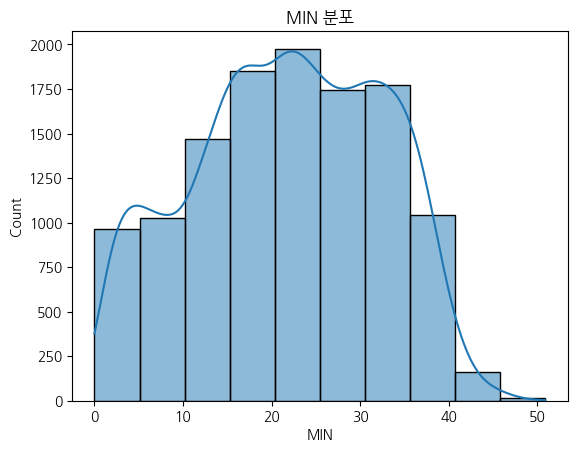

In [36]:
sns.histplot(data=games_details_season2022, x="MIN", bins=10, kde=True) 
plt.title("MIN 분포")
plt.show()


In [37]:
games_details_season2022.describe()

,GAME_ID,TEAM_ID,PLAYER_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,1.202400e+04,1.202400e+04,1.202400e+04,12024.000000,12024.000000,12024.000000,12024.000000,12024.000000,12024.000000,12024.000000,...,12024.000000,12024.000000,12024.000000,12024.000000,12024.000000,12024.000000,12024.000000,12024.000000,12024.000000,12024.000000
mean,2.066910e+07,1.610613e+09,1.283228e+06,21.807434,3.700266,7.937209,0.435656,1.096058,3.105123,0.251401,...,0.948852,3.010729,3.959581,2.231953,0.678144,0.435047,1.307801,1.881154,10.165752,0.000000
std,3.601162e+06,8.658384e+00,6.125238e+05,10.614400,3.160564,5.876573,0.258199,1.419498,2.901802,0.290508,...,1.313452,2.631766,3.323656,2.471531,0.928556,0.789985,1.408492,1.484097,8.625628,10.847985
min,1.220000e+07,1.610613e+09,2.544000e+03,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.000000
25%,2.220005e+07,1.610613e+09,1.626156e+06,14.083333,1.000000,3.000000,0.286000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,-7.000000
50%,2.220019e+07,1.610613e+09,1.629012e+06,22.158333,3.000000,7.000000,0.444000,1.000000,3.000000,0.200000,...,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000
75%,2.220034e+07,1.610613e+09,1.630208e+06,30.500000,5.000000,11.000000,0.588000,2.000000,5.000000,0.500000,...,1.000000,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,7.000000
max,2.220048e+07,1.610613e+09,1.631371e+06,50.900000,22.000000,35.000000,1.000000,11.000000,17.000000,1.000000,...,12.000000,20.000000,29.000000,17.000000,7.000000,8.000000,11.000000,6.000000,59.000000,45.000000


In [38]:
games_season2022.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,5.420000e+02,5.420000e+02,5.420000e+02,542.0,5.420000e+02,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,2.100095e+07,1.610613e+09,1.610613e+09,2022.0,1.610613e+09,114.284133,0.473079,0.777838,0.356135,25.280443,44.601476,1.610613e+09,111.238007,0.461945,0.778458,0.347192,24.234317,43.238007,0.588561
std,3.251819e+06,8.607705e+00,8.777325e+00,0.0,8.607705e+00,11.862602,0.056104,0.099077,0.084650,4.871618,6.788857,8.777325e+00,11.335768,0.053784,0.102618,0.081211,4.814343,6.511514,0.492549
min,1.220000e+07,1.610613e+09,1.610613e+09,2022.0,1.610613e+09,75.000000,0.304000,0.400000,0.103000,14.000000,24.000000,1.610613e+09,81.000000,0.320000,0.300000,0.107000,12.000000,23.000000,0.000000
25%,2.220007e+07,1.610613e+09,1.610613e+09,2022.0,1.610613e+09,106.000000,0.435000,0.719250,0.296000,22.000000,40.000000,1.610613e+09,103.250000,0.426000,0.719250,0.289250,21.000000,39.000000,0.000000
50%,2.220021e+07,1.610613e+09,1.610613e+09,2022.0,1.610613e+09,114.000000,0.470500,0.786000,0.358000,25.000000,45.000000,1.610613e+09,111.000000,0.462000,0.787000,0.346000,24.000000,43.000000,1.000000
75%,2.220034e+07,1.610613e+09,1.610613e+09,2022.0,1.610613e+09,123.000000,0.506000,0.846000,0.416250,29.000000,49.000000,1.610613e+09,119.000000,0.495000,0.847500,0.405750,27.000000,48.000000,1.000000
max,2.220048e+07,1.610613e+09,1.610613e+09,2022.0,1.610613e+09,153.000000,0.655000,1.000000,0.636000,42.000000,67.000000,1.610613e+09,145.000000,0.649000,1.000000,0.593000,40.000000,62.000000,1.000000


In [39]:
ranking_season2022.describe()

,TEAM_ID,G,W,L,W_PCT
count,2.370000e+03,2370.000000,2370.000000,2370.000000,2370.000000
mean,1.610613e+09,13.591561,6.801266,6.790295,0.481152
std,8.657268e+00,10.180901,5.600285,5.672532,0.261506
min,1.610613e+09,0.000000,0.000000,0.000000,0.000000
25%,1.610613e+09,4.000000,2.000000,2.000000,0.333000
50%,1.610613e+09,13.000000,6.000000,6.000000,0.500000
75%,1.610613e+09,23.000000,11.000000,11.000000,0.632000
max,1.610613e+09,35.000000,22.000000,26.000000,1.000000


In [40]:
games_details_season2022.sort_index(inplace=True)
games_season2022.sort_index(inplace=True)
ranking_season2022.sort_index(inplace=True)

### 구분 기준 통일

- 날짜: DATE
- 팀: TEAM
- 게임: GAME_ID
- 플레이어: PLAYER_ID

In [41]:
games_season2022[games_season2022['VISITOR_TEAM_ID'] != games_season2022['TEAM_ID_away']]

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
DATE,,,,,,,,,,,,,,,,,,,


In [42]:
team_map = ranking_season2022[['TEAM', 'TEAM_ID']].drop_duplicates().set_index('TEAM_ID')['TEAM'].to_dict()

In [43]:
games_details_season2022['TEAM'] = games_details_season2022['TEAM_ID'].map(team_map)
games_details_season2022.drop(columns=['TEAM_ID'], inplace=True)
games_details_season2022

,GAME_ID,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,TEAM
DATE,,,,,,,,,,,,,,,,,,,,,
2022-09-30,12200001,1630176,0,8.333333,1,2,0.500,0,0,0.000,...,2.0,3,0,0,2,0,0,3,-6,Washington
2022-09-30,12200001,203952,F,16.250000,1,8,0.125,1,4,0.250,...,5.0,6,1,1,0,0,1,5,-2,Golden State
2022-09-30,12200001,203110,F,13.083333,1,2,0.500,0,1,0.000,...,8.0,8,2,0,0,1,0,4,-2,Golden State
2022-09-30,12200001,1626172,C,15.950000,2,7,0.286,0,0,0.000,...,4.0,7,1,0,0,1,3,4,-2,Golden State
2022-09-30,12200001,1629673,G,19.166667,1,10,0.100,0,4,0.000,...,5.0,5,1,1,1,1,1,5,4,Golden State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,22200478,201959,0,25.033333,3,3,1.000,0,0,0.000,...,4.0,4,1,1,0,0,3,6,-3,Washington
2022-12-22,22200478,1628420,G,30.266667,2,5,0.400,1,3,0.333,...,4.0,4,4,0,0,2,1,5,3,Washington
2022-12-22,22200478,203078,G,31.083333,13,20,0.650,0,3,0.000,...,4.0,5,5,0,0,2,2,30,4,Washington


In [44]:
games_season2022['HOME_TEAM'] = games_season2022['HOME_TEAM_ID'].map(team_map)
games_season2022['VISITOR_TEAM'] = games_season2022['VISITOR_TEAM_ID'].map(team_map)
games_season2022.drop(columns=['HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'TEAM_ID_home', 'TEAM_ID_away'], inplace=True)
games_season2022

,GAME_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM,VISITOR_TEAM
DATE,,,,,,,,,,,,,,,,,
2022-09-30,12200001,2022,87,0.369,0.633,0.171,20,44,96,0.367,0.775,0.269,18,62,0,Washington,Golden State
2022-10-01,12200003,2022,102,0.430,0.714,0.351,22,50,107,0.494,0.724,0.357,25,41,0,Milwaukee,Memphis
2022-10-02,12200006,2022,114,0.483,0.667,0.375,20,61,82,0.323,0.588,0.250,21,46,1,Toronto,Utah
2022-10-02,12200005,2022,134,0.571,0.800,0.468,41,56,93,0.347,0.643,0.152,13,43,1,Boston,Charlotte
2022-10-02,12200004,2022,104,0.458,0.667,0.410,29,47,95,0.353,0.900,0.242,23,46,1,Golden State,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21,22200468,2022,108,0.429,1.000,0.378,22,47,110,0.500,0.773,0.292,20,47,0,Atlanta,Chicago
2022-12-21,22200467,2022,113,0.441,0.909,0.297,27,49,93,0.392,0.735,0.261,15,46,1,Philadelphia,Detroit
2022-12-21,22200466,2022,114,0.482,0.786,0.313,22,37,106,0.470,0.682,0.433,20,46,1,Cleveland,Milwaukee


In [45]:
ranking_season2022.drop(columns=['TEAM_ID'], inplace=True)

### 상위 팀 하위 팀 분류하기

기준: 승률 (Win Percentage, W%)

상위팀: 승률 60% 이상

중위팀: 승률 40% ~ 59%

하위팀: 승률 39% 이하

In [46]:
bins = [-1, 0.4, 0.6, 1.1]
labels = ["하위팀", "중위팀", "상위팀"]
recent_ranking = ranking_season2022.loc['2022-12-22', ['TEAM', 'W_PCT']].copy()
recent_ranking['TEAM_LVL'] = pd.cut(recent_ranking['W_PCT'], bins=bins, labels=labels, right=False)
team_level = recent_ranking[['TEAM', 'TEAM_LVL']]
team_level_dict = dict(team_level.drop_duplicates("TEAM").set_index("TEAM")["TEAM_LVL"])

In [ ]:
games_details_season2022['TEAM_LVL'] = games_details_season2022['TEAM'].map(team_level_dict)
games_details_season2022.sort_index(ascending=False)

,GAME_ID,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,TEAM,TEAM_LVL
DATE,,,,,,,,,,,,,,,,,,,,,
2022-12-22,22200477,1629641,F,18.100000,1,1,1.000,0,0,0.000,...,2,0,1,0,2,5,2,-2,San Antonio,하위팀
2022-12-22,22200477,1626169,0,12.616667,4,5,0.800,1,2,0.500,...,4,2,1,2,1,1,12,13,San Antonio,하위팀
2022-12-22,22200477,1629676,0,3.516667,0,0,0.000,0,0,0.000,...,0,0,0,0,0,1,0,4,San Antonio,하위팀
2022-12-22,22200477,202066,0,1.983333,0,1,0.000,0,0,0.000,...,0,0,0,0,0,0,0,-6,New Orleans,상위팀
2022-12-22,22200477,1631110,F,31.016667,7,14,0.500,2,4,0.500,...,9,6,1,0,2,1,23,-14,San Antonio,하위팀
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,12200001,204001,C,21.250000,3,10,0.300,0,6,0.000,...,4,4,4,1,1,5,7,1,Washington,하위팀
2022-09-30,12200001,1629060,F,25.166667,5,9,0.556,0,4,0.000,...,9,0,1,0,1,0,13,-3,Washington,하위팀
2022-09-30,12200001,1628398,F,20.066667,3,9,0.333,1,5,0.200,...,4,1,0,1,3,3,7,-11,Washington,하위팀


In [ ]:
games_season2022['HOME_TEAM_LVL'] = games_season2022['HOME_TEAM'].map(team_level_dict)
games_season2022['VISITOR_TEAM_LVL'] = games_season2022['VISITOR_TEAM'].map(team_level_dict)
games_season2022.sort_index(ascending=False)

,GAME_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM,VISITOR_TEAM,HOME_TEAM_LVL,VISITOR_TEAM_LVL
DATE,,,,,,,,,,,,,,,,,,,
2022-12-22,22200477,2022,126,0.484,0.926,0.382,25,46,117,0.478,0.815,0.321,23,44,1,New Orleans,San Antonio,상위팀,하위팀
2022-12-22,22200478,2022,120,0.488,0.952,0.457,16,40,112,0.561,0.765,0.333,20,37,1,Utah,Washington,중위팀,하위팀
2022-12-21,22200466,2022,114,0.482,0.786,0.313,22,37,106,0.470,0.682,0.433,20,46,1,Cleveland,Milwaukee,상위팀,상위팀
2022-12-21,22200467,2022,113,0.441,0.909,0.297,27,49,93,0.392,0.735,0.261,15,46,1,Philadelphia,Detroit,상위팀,하위팀
2022-12-21,22200468,2022,108,0.429,1.000,0.378,22,47,110,0.500,0.773,0.292,20,47,0,Atlanta,Chicago,중위팀,중위팀
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-02,12200007,2022,134,0.546,0.545,0.457,32,60,96,0.355,0.655,0.262,21,44,1,Houston,San Antonio,하위팀,하위팀
2022-10-02,12200004,2022,104,0.458,0.667,0.410,29,47,95,0.353,0.900,0.242,23,46,1,Golden State,Washington,중위팀,하위팀
2022-10-02,12200005,2022,134,0.571,0.800,0.468,41,56,93,0.347,0.643,0.152,13,43,1,Boston,Charlotte,상위팀,하위팀


In [ ]:
ranking_season2022['TEAM_LVL'] = ranking_season2022['TEAM'].map(team_level_dict)
ranking_season2022.sort_index(ascending=False)

,SEASON_ID,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,TEAM_LVL
DATE,,,,,,,,,,
2022-12-22,22022,West,Denver,30,19,11,0.633,10-3,9-8,상위팀
2022-12-22,22022,East,Washington,33,12,21,0.364,8-7,4-14,하위팀
2022-12-22,22022,West,Portland,32,17,15,0.531,7-6,10-9,중위팀
2022-12-22,22022,West,New Orleans,31,19,12,0.613,13-4,6-8,상위팀
2022-12-22,22022,West,Phoenix,32,19,13,0.594,14-4,5-9,중위팀
...,...,...,...,...,...,...,...,...,...,...
2022-09-30,12022,East,Orlando,0,0,0,0.000,0-0,0-0,하위팀
2022-09-30,12022,East,Washington,1,0,1,0.000,0-1,0-0,하위팀
2022-09-30,12022,West,Golden State,1,1,0,1.000,0-0,1-0,중위팀


### Column 재정렬

In [50]:
games_details_season2022.columns

Index(['GAME_ID', 'PLAYER_ID', 'START_POSITION', 'MIN', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS', 'TEAM',
       'TEAM_LVL'],
      dtype='object')

In [51]:
detail_cols = ['GAME_ID', 'TEAM', 'TEAM_LVL', 'PLAYER_ID', 'START_POSITION', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']
games_details_season2022 = games_details_season2022[detail_cols]
games_details_season2022.head(10)

,GAME_ID,TEAM,TEAM_LVL,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
DATE,,,,,,,,,,,,,,,,,,,,,
2022-09-30,12200001,Washington,하위팀,1630176,0,8.333333,1,2,0.500,0,...,1,2.0,3,0,0,2,0,0,3,-6
2022-09-30,12200001,Golden State,중위팀,203952,F,16.250000,1,8,0.125,1,...,1,5.0,6,1,1,0,0,1,5,-2
2022-09-30,12200001,Golden State,중위팀,203110,F,13.083333,1,2,0.500,0,...,0,8.0,8,2,0,0,1,0,4,-2
2022-09-30,12200001,Golden State,중위팀,1626172,C,15.950000,2,7,0.286,0,...,3,4.0,7,1,0,0,1,3,4,-2
2022-09-30,12200001,Golden State,중위팀,1629673,G,19.166667,1,10,0.100,0,...,0,5.0,5,1,1,1,1,1,5,4
2022-09-30,12200001,Golden State,중위팀,201939,G,13.083333,1,7,0.143,1,...,0,3.0,3,2,0,0,4,0,6,-2
2022-09-30,12200001,Golden State,중위팀,1630541,0,25.300000,2,6,0.333,1,...,0,1.0,1,2,1,0,0,5,5,7
2022-09-30,12200001,Golden State,중위팀,1628978,0,17.100000,3,4,0.750,2,...,0,7.0,7,2,0,0,0,0,9,9
2022-09-30,12200001,Golden State,중위팀,203210,0,16.083333,0,3,0.000,0,...,3,2.0,5,1,0,0,0,1,0,9


In [52]:
games_season2022.columns

Index(['GAME_ID', 'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away',
       'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS',
       'HOME_TEAM', 'VISITOR_TEAM', 'HOME_TEAM_LVL', 'VISITOR_TEAM_LVL'],
      dtype='object')

In [53]:
games_cols = ['GAME_ID', 'HOME_TEAM', 'HOME_TEAM_LVL', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'VISITOR_TEAM', 'VISITOR_TEAM_LVL', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']
games_season2022 = games_season2022[games_cols]
games_season2022

,GAME_ID,HOME_TEAM,HOME_TEAM_LVL,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,VISITOR_TEAM,VISITOR_TEAM_LVL,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
DATE,,,,,,,,,,,,,,,,,,
2022-09-30,12200001,Washington,하위팀,87,0.369,0.633,0.171,20,44,Golden State,중위팀,96,0.367,0.775,0.269,18,62,0
2022-10-01,12200003,Milwaukee,상위팀,102,0.430,0.714,0.351,22,50,Memphis,상위팀,107,0.494,0.724,0.357,25,41,0
2022-10-02,12200006,Toronto,중위팀,114,0.483,0.667,0.375,20,61,Utah,중위팀,82,0.323,0.588,0.250,21,46,1
2022-10-02,12200005,Boston,상위팀,134,0.571,0.800,0.468,41,56,Charlotte,하위팀,93,0.347,0.643,0.152,13,43,1
2022-10-02,12200004,Golden State,중위팀,104,0.458,0.667,0.410,29,47,Washington,하위팀,95,0.353,0.900,0.242,23,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21,22200468,Atlanta,중위팀,108,0.429,1.000,0.378,22,47,Chicago,중위팀,110,0.500,0.773,0.292,20,47,0
2022-12-21,22200467,Philadelphia,상위팀,113,0.441,0.909,0.297,27,49,Detroit,하위팀,93,0.392,0.735,0.261,15,46,1
2022-12-21,22200466,Cleveland,상위팀,114,0.482,0.786,0.313,22,37,Milwaukee,상위팀,106,0.470,0.682,0.433,20,46,1


In [54]:
ranking_season2022.columns

Index(['SEASON_ID', 'CONFERENCE', 'TEAM', 'G', 'W', 'L', 'W_PCT',
       'HOME_RECORD', 'ROAD_RECORD', 'TEAM_LVL'],
      dtype='object')

In [55]:
ranking_cols = ['SEASON_ID', 'CONFERENCE', 'TEAM', 'TEAM_LVL', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD']
ranking_season2022 = ranking_season2022[ranking_cols]
ranking_season2022

,SEASON_ID,CONFERENCE,TEAM,TEAM_LVL,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
DATE,,,,,,,,,,
2022-09-30,12022,West,Utah,중위팀,0,0,0,0.000,0-0,0-0
2022-09-30,12022,West,Dallas,중위팀,0,0,0,0.000,0-0,0-0
2022-09-30,12022,West,Denver,상위팀,0,0,0,0.000,0-0,0-0
2022-09-30,12022,West,Houston,하위팀,0,0,0,0.000,0-0,0-0
2022-09-30,12022,West,L.A. Lakers,중위팀,0,0,0,0.000,0-0,0-0
...,...,...,...,...,...,...,...,...,...,...
2022-12-22,22022,East,Boston,상위팀,32,22,10,0.688,11-5,11-5
2022-12-22,22022,East,Milwaukee,상위팀,31,22,9,0.710,14-3,8-6
2022-12-22,22022,West,Houston,하위팀,31,9,22,0.290,6-9,3-13


### Preseason Regular Season 구분하기

In [56]:
preseason_dates = ranking_season2022[ranking_season2022['SEASON_ID'].str.startswith('1')].index
regular_dates = ranking_season2022[ranking_season2022['SEASON_ID'].str.startswith('2')].index

In [57]:
len(set(preseason_dates)), len(set(regular_dates))

(15, 64)

In [58]:
len(set(games_details_season2022.index.tolist()))

79

In [59]:
len(set(games_season2022.index.tolist()))

79

In [60]:
games_details_season2022.loc[preseason_dates].to_csv(DATA_DIR / '2022' / 'games_details_pre.csv')
games_details_season2022.loc[regular_dates].to_csv(DATA_DIR / '2022' / 'games_details_regular.csv')

In [61]:
games_season2022.loc[preseason_dates].to_csv(DATA_DIR / '2022' / 'games_pre.csv')
games_season2022.loc[regular_dates].to_csv(DATA_DIR / '2022' / 'games_regular.csv')

In [62]:
ranking_season2022.drop(columns=['SEASON_ID'], inplace=True)
ranking_season2022.loc[preseason_dates].to_csv(DATA_DIR / '2022' / 'ranking_pre.csv')
ranking_season2022.loc[regular_dates].to_csv(DATA_DIR / '2022' / 'ranking_regular.csv')